<h2></h2>


<h1><center><u>MAJOR PROJECT</u></center></h1>
<h2><center><u>POLLUTION IN INDIA</u></center></h2>
<h2><center><u>NOTEBOOK USED FOR MODELING</u></center></h2>
<h2 style="text-align:right">Submitted By:</h2>
<h2 style="text-align:right">-</h2>
<h2 style="text-align:right">-</h2>

<h4>Include the libraries that we are going to use</h4>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from numpy import log
from statsmodels.tsa.stattools import adfuller
import sys
from pandas.plotting import lag_plot
import numpy as np
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [19]:
df = pd.read_csv('final.csv', index_col=0)#load the data from csv named final.csv

In [20]:
df.head(50)

,City,Coordinates,Time,PM10_min,PM10_max,PM10_avg,PM2.5_min,PM2.5_max,PM2.5_avg,NO2_min,...,NH3_avg,SO2_min,SO2_max,SO2_avg,CO_min,CO_max,CO_avg,OZONE_min,OZONE_max,OZONE_avg
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,78.000000,170.000000,121.000000,59.000000,239.000000,134.000000,14.000000,...,5.000000,3.000000,7.000000,6.000000,19.00,74.000000,22.000000,10.000000,122.000000,32.000000
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,64.000000,113.000000,91.000000,42.000000,227.000000,111.000000,1.000000,...,3.000000,5.000000,109.000000,13.000000,16.00,44.000000,19.000000,4.000000,43.000000,13.000000
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,57.000000,93.000000,69.000000,13.000000,89.000000,48.000000,23.000000,...,NaN,4.000000,121.000000,28.000000,10.00,77.000000,37.000000,4.000000,127.000000,52.000000
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,44.000000,114.000000,80.000000,29.000000,147.000000,65.000000,9.000000,...,5.000000,9.000000,12.000000,11.000000,24.00,82.000000,42.000000,6.000000,83.000000,61.000000
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,68.000000,95.000000,81.000000,60.000000,81.000000,71.000000,13.000000,...,4.000000,3.000000,29.000000,19.000000,15.00,40.000000,26.000000,5.000000,84.000000,28.000000
5,Amaravati,"[16.5744201, 80.3556079]",2020-09-22 14:00:00,11.000000,41.000000,22.000000,6.000000,27.000000,14.000000,18.000000,...,3.000000,10.000000,30.000000,23.000000,11.00,36.000000,22.000000,16.000000,41.000000,27.000000
6,Ambala,"[30.3843674, 76.770421]",2020-09-22 14:00:00,73.000000,149.000000,118.000000,42.000000,134.000000,85.000000,14.000000,...,3.000000,13.000000,23.000000,18.000000,13.00,18.000000,15.000000,13.000000,129.000000,49.000000
7,Amritsar,"[31.6343083, 74.8736788]",2020-09-22 14:00:00,46.000000,130.000000,89.000000,48.000000,175.000000,92.000000,23.000000,...,3.000000,11.000000,27.000000,14.000000,11.00,23.000000,16.000000,5.000000,65.000000,34.000000
8,Ankleshwar,"[21.6293206, 72.9945103]",2020-09-22 14:00:00,NaN,NaN,NaN,38.000000,97.000000,63.000000,27.000000,...,13.000000,3.000000,25.000000,15.000000,38.00,60.000000,44.000000,2.000000,7.000000,3.000000
9,Asansol,"[23.6871297, 86.9746587]",2020-09-22 14:00:00,21.000000,48.000000,31.000000,10.000000,37.000000,23.000000,15.000000,...,3.000000,3.000000,7.000000,4.000000,5.00,22.000000,15.000000,8.000000,25.000000,18.000000


## BANGLORE


In [21]:
tdf = df[df['City']=='Bengaluru']#lets take the target city as Bengaluru then we will look at models for other cities

In [22]:
tdf.columns#remove these columns as our main focus is on PM2.5_avg we drop others columns for now

Index(['City', 'Coordinates', 'Time', 'PM10_min', 'PM10_max', 'PM10_avg',
       'PM2.5_min', 'PM2.5_max', 'PM2.5_avg', 'NO2_min', 'NO2_max', 'NO2_avg',
       'NH3_min', 'NH3_max', 'NH3_avg', 'SO2_min', 'SO2_max', 'SO2_avg',
       'CO_min', 'CO_max', 'CO_avg', 'OZONE_min', 'OZONE_max', 'OZONE_avg'],
      dtype='object')

#### After dropping these columns we set date as index and make a univariate time series

In [23]:
drop_columns=['PM10_min', 'PM10_max', 'PM10_avg', 'PM2.5_min', 'PM2.5_max'
       , 'NO2_min', 'NO2_max', 'NO2_avg', 'NH3_min', 'NH3_max',
       'NH3_avg', 'SO2_min', 'SO2_max', 'SO2_avg', 'CO_min', 'CO_max',
       'CO_avg', 'OZONE_min', 'OZONE_max', 'OZONE_avg', 'Coordinates']

In [24]:
tdf.drop(columns=drop_columns,axis=1,inplace=True)

C:\Users\pratham\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
tdf.drop(columns='City',axis=1,inplace=True)

In [26]:
tdf['Time']= pd.to_datetime(tdf['Time'],dayfirst=True)
# Set the index to the 'date' column
tdf.set_index('Time', inplace = True)
tdf.dtypes

<ipython-input-26-5eff9ba739b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['Time']= pd.to_datetime(tdf['Time'],dayfirst=True)


PM2.5_avg    float64
dtype: object

In [28]:
tdf##Final time series

,PM2.5_avg
Time,
2020-09-22 14:00:00,27.750
2020-09-22 16:00:00,28.000
2020-09-22 19:00:00,27.750
2020-09-22 22:00:00,29.750
2020-09-23 04:00:00,30.875
...,...
2020-10-21 17:00:00,43.250
2020-10-21 18:00:00,44.125
2020-10-21 19:00:00,44.000


In [29]:
b=tdf.resample('12H').mean()

In [30]:
b=b.interpolate()

<Figure size 720x720 with 0 Axes>

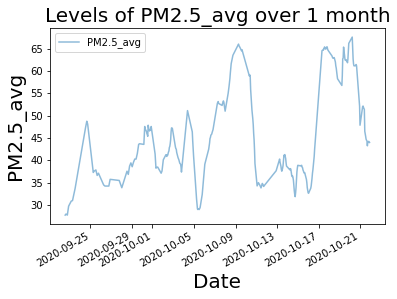

In [31]:
plt.figure(figsize=(10, 10))
tdf.plot(alpha=0.5, style='-')
plt.title('Levels of PM2.5_avg over 1 month', fontsize=20)
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

<Figure size 720x720 with 0 Axes>

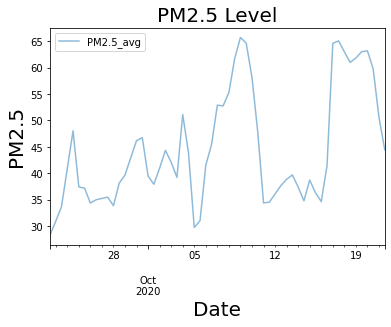

In [32]:
plt.figure(figsize=(10, 10))
b.plot(alpha=0.5, style='-')
plt.title('PM2.5 Level', fontsize=20)
plt.ylabel('PM2.5',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

#### It can be observed from the plot that time series has trend and seasonality so our data is not stationary lets further verify this by performing the AD fuller test and it also confirms the value for the parameter d in ARIMA model

In [34]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(b['PM2.5_avg'].dropna())[1])

p-value: 0.017563031712493613


In [35]:
print("p-value:", adfuller(b['PM2.5_avg'].diff().dropna())[1])

p-value: 1.2471868627797312e-06


## We can observe that differencing is not  required as p-value is 0.017, so we keep d=0



#### As it can be clearly seen that for d=1 our data passes the AD Fuller test  now lets find out seasonality for the data

In [89]:
b['new']=b['PM2.5_avg']#made copy because there was a decimal in PM2.5_avg column name
c=b.copy()

In [90]:
c.drop(['PM2.5_avg'],axis=1,inplace=True)

In [91]:
c.groupby(pd.Grouper(freq="W")).new.idxmax()

Time
2020-09-27   2020-09-24 12:00:00
2020-10-04   2020-10-04 00:00:00
2020-10-11   2020-10-09 00:00:00
2020-10-18   2020-10-17 12:00:00
2020-10-25   2020-10-20 00:00:00
Freq: W-SUN, Name: new, dtype: datetime64[ns]

In [93]:
summary=c.groupby(pd.Grouper(freq="W")).agg(
    max_Level = pd.NamedAgg(column='new', aggfunc='max'),
    max_Date = pd.NamedAgg(column='new', aggfunc='idxmax'))

In [94]:
summary['max_Date'][1]-summary['max_Date'][2]

Timedelta('-5 days +00:00:00')

In [95]:
summary

,max_Level,max_Date
Time,,
2020-09-27,48.041667,2020-09-24 12:00:00
2020-10-04,51.125000,2020-10-04 00:00:00
2020-10-11,65.708333,2020-10-09 00:00:00
2020-10-18,65.056818,2020-10-17 12:00:00
2020-10-25,63.166667,2020-10-20 00:00:00


In [96]:
summary.shift(1)

,max_Level,max_Date
Time,,
2020-09-27,NaN,NaT
2020-10-04,48.041667,2020-09-24 12:00:00
2020-10-11,51.125000,2020-10-04 00:00:00
2020-10-18,65.708333,2020-10-09 00:00:00
2020-10-25,65.056818,2020-10-17 12:00:00


In [97]:
summary-summary.shift(1)

,max_Level,max_Date
Time,,
2020-09-27,NaN,NaT
2020-10-04,3.083333,9 days 12:00:00
2020-10-11,14.583333,5 days 00:00:00
2020-10-18,-0.651515,8 days 12:00:00
2020-10-25,-1.890152,2 days 12:00:00


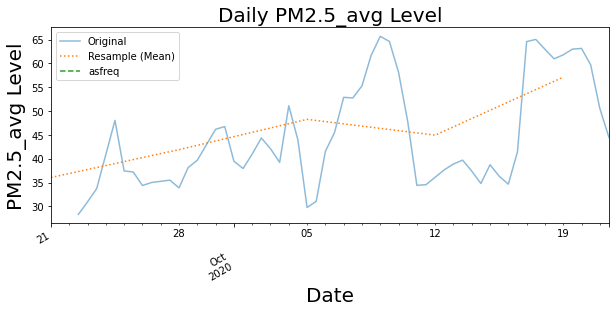

In [98]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
c.plot(alpha=0.5, style='-',ax=ax)
c.resample('W').mean().plot(style=':',ax=ax)   ## Mean taken weekly
c.asfreq('W').plot(style='--',ax=ax);        
plt.legend(['Original', 'Resample (Mean)', 'asfreq'],
loc='upper left',fontsize=10);
plt.title('Daily PM2.5_avg Level', fontsize=20)
plt.ylabel('PM2.5_avg Level',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

### Let's Decompose our data into different components and observe their plots

In [45]:
b.drop(['new'],axis=1,inplace=True)

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(b, model='multiplicative', period =7)
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [47]:
trend.head()

Time
2020-09-22 12:00:00          NaN
2020-09-23 00:00:00          NaN
2020-09-23 12:00:00          NaN
2020-09-24 00:00:00    36.644983
2020-09-24 12:00:00    37.511054
Freq: 12H, Name: trend, dtype: float64

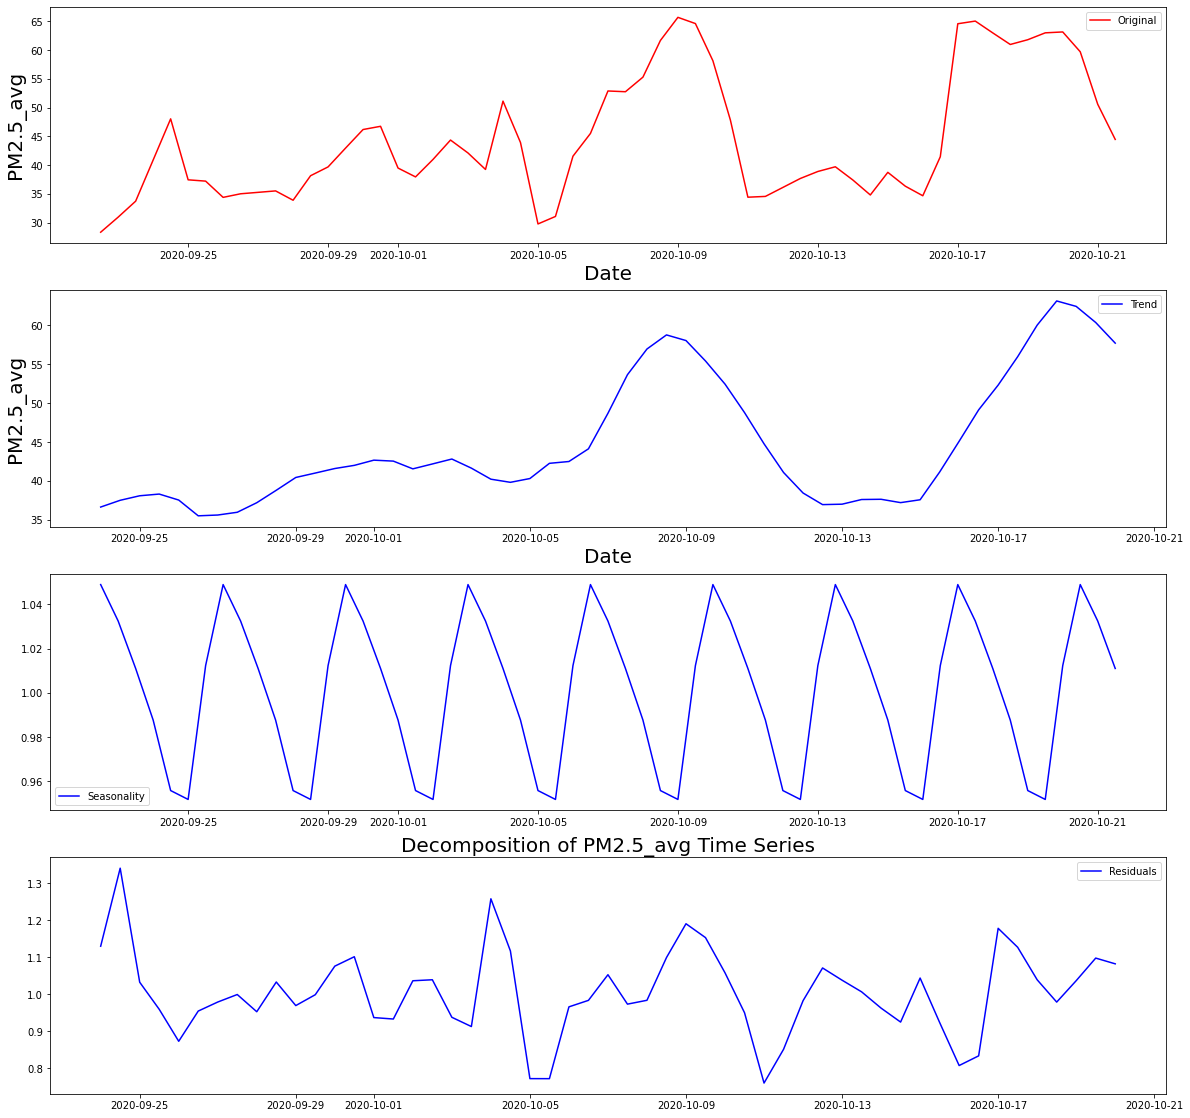

<Figure size 432x288 with 0 Axes>

In [48]:

plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(b, label='Original', color="red")
plt.legend(loc='best')
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.title('Decomposition of PM2.5_avg Time Series', fontsize=20)
plt.show()

plt.tight_layout()

## The plot shows that the data has both trend & seasonality. That means it is not stationary.

In [49]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(trend.dropna())[1])

p-value: 0.03579725321953039


In [50]:
#Here we have done 90/10 split of our data 
train_data=b[:datetime(2020,10,18)]
test_data=b[datetime(2020,10,19):datetime(2020,10,21)]

In [51]:
data_d = b.diff().dropna()

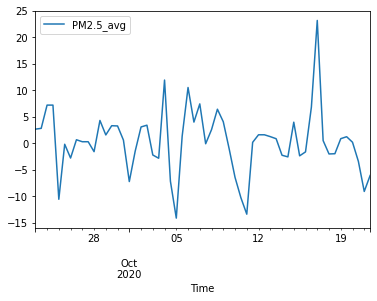

In [52]:
data_d.plot()

In [53]:
data_d.shape

(58, 1)

In [54]:
data_d.head(2)

,PM2.5_avg
Time,
2020-09-23 00:00:00,2.625000
2020-09-23 12:00:00,2.776786


In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [64]:
print("p-value:", adfuller(b['PM2.5_avg'].dropna())[1])

p-value: 0.017563031712493613


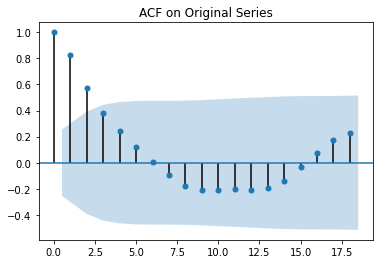

In [61]:
fig = plot_acf(b['PM2.5_avg'].dropna(), 
               title="ACF on Original Series") 

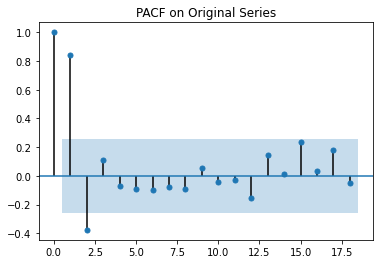

In [63]:
fig = plot_pacf(b['PM2.5_avg'].dropna(), 
               title="PACF on Original Series") 

#### It can be seen p=2 from the pacf plot and q=2 from the acf plot also we have already discoverd the value for parameter d, so we go on with this model

In [99]:
model3 = ARIMA(train_data['PM2.5_avg'], order=(2,0,2))
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              PM2.5_avg   No. Observations:                   52
Model:                     ARMA(2, 2)   Log Likelihood                -162.941
Method:                       css-mle   S.D. of innovations              5.402
Date:                Wed, 18 Nov 2020   AIC                            337.882
Time:                        11:54:29   BIC                            349.590
Sample:                    09-22-2020   HQIC                           342.370
                         - 10-18-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              43.2239      1.347     32.090      0.000      40.584      45.864
ar.L1.PM2.5_avg     1.6805      0.111     15.128      0.000       1.463       1.898
ar.L2.PM2.5_avg    -0.7162      0.114     -6.289      0.000      -0.939      -0.493
ma.L1.PM2.5_avg    -0.5803      0.152     -3.817      0.000      -0.878      -0.282
ma.L2.PM2.5_avg    -0.4197      0.138     -3.047      0.002      -0.690      -0.150
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1732           -0.1411j            1.1816           -0.0191
AR.2            1.1732           +0.1411j            1.1816            0.0191
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -2.3825           +0.0000j            2.3825            0.5000
-----------------------------------------------------------------------------
"""

### We can observe that P>|z| is good for all, so we can check this model accuracy as this fits well

In [69]:
fcast3=results3.forecast(5)
fcast3=pd.DataFrame({"Forecast": fcast3[0]},index=test_data.index)
residuals3 = test_data - fcast3.values
residuals3.head()

,PM2.5_avg
Time,
2020-10-19 00:00:00,3.117687
2020-10-19 12:00:00,10.182485
2020-10-20 00:00:00,14.883074
2020-10-20 12:00:00,14.866955
2020-10-21 00:00:00,8.252175


In [70]:
fcast3

,Forecast
Time,
2020-10-19 00:00:00,58.695805
2020-10-19 12:00:00,52.828879
2020-10-20 00:00:00,48.283592
2020-10-20 12:00:00,44.847331
2020-10-21 00:00:00,42.328183


Text(0, 0.5, 'Error')

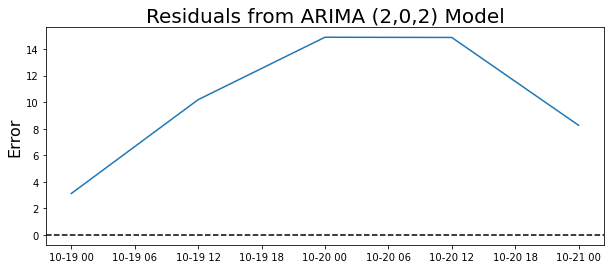

In [75]:
plt.figure(figsize=(10,4))
plt.plot(residuals3)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA (2,0,2) Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

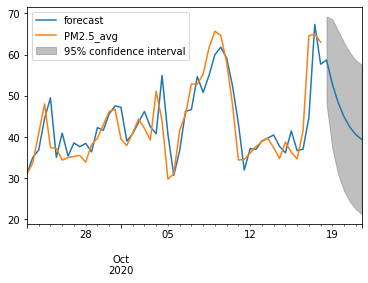

In [76]:
results3.plot_predict(1, 58)
plt.show()

In [77]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals3/test_data)),6))

Mean Absolute Percent Error: PM2.5_avg    0.171954
dtype: float64


In [78]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals3**2)))

Root Mean Squared Error: PM2.5_avg    11.171693
dtype: float64


<hr>

## So,clearly we can see that we have MAPE of  17.19% for this model which is quite good

<hr>

## Finally we fit our data in Seasonal ARIMA model to get  the better forecasting

### Here we use auto arima to select the parameters for the SARIMA model

In [79]:
import pmdarima

In [80]:
from pmdarima import auto_arima
pm_arima = auto_arima(train_data['PM2.5_avg'], test = 'adf'
                      , start_p=1, start_q=1, m = 7,
                      stepwise=True, trace = True, 
                      suppress_warnings=True,
                      error_action='ignore', seasonal = True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,0,1)[7]             : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=348.229, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=349.708, Time=0.03 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(1,0,0)[7]             : AIC=350.226, Time=0.02 sec
 ARIMA(0,2,0)(0,0,1)[7]             : AIC=350.224, Time=0.03 sec
 ARIMA(0,2,0)(1,0,1)[7]             : AIC=inf, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[7]             : AIC=347.723, Time=0.01 sec
 ARIMA(1,2,0)(0,0,1)[7]             : AIC=349.699, Time=0.04 sec
 ARIMA(1,2,0)(1,0,1)[7]             : AIC=inf, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[7]             : AIC=339.470, Time=0.02 sec
 ARIMA(2,2,0)(1,0,0)[7]             : AIC=341.398, Time=0.05 sec
 ARIMA(2,2,0)(0,0,1)[7]             : AIC=341.348, Time=0.05 sec
 ARIMA(2,2,0)(1,0,1)[7]             : AIC=inf, Time=0.25 sec
 ARIMA(3,2,0)(0,0,0)[7]             : AIC=338.075, Time=0.04 sec
 A

### Fit the SARIMA Model


In [111]:
my_order = (3,2,0)
my_seasonal_order = (0, 0, 0, 7)
# define model
model4 = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

In [112]:
#fit the model
start = time()
model4_fit = model4.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.09237861633300781


In [113]:
#summary of the model
print(model4_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              PM2.5_avg   No. Observations:                   52
Model:               SARIMAX(3, 2, 0)   Log Likelihood                -165.038
Date:                Wed, 18 Nov 2020   AIC                            338.075
Time:                        11:59:30   BIC                            345.723
Sample:                    09-22-2020   HQIC                           340.987
                         - 10-18-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4440      0.121     -3.673      0.000      -0.681      -0.207
ar.L2         -0.5427      0.135     -4.022      0.000      -0.807      -0.278
ar.L3         -0.2810      0.162     -1.732      0.0

In [114]:
fcast4=model4_fit.forecast(5)
fcast4=pd.DataFrame({"Forecast": fcast4[0]},index=test_data.index)
residuals4 = test_data - fcast4.values
residuals4.head()

,PM2.5_avg
Time,
2020-10-19 00:00:00,-7.962917
2020-10-19 12:00:00,-6.765045
2020-10-20 00:00:00,-6.609742
2020-10-20 12:00:00,-10.062123
2020-10-21 00:00:00,-19.196052


Text(0, 0.5, 'Error')

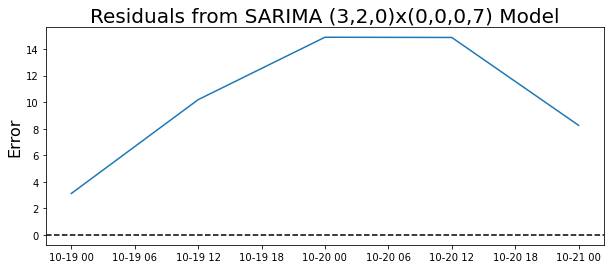

In [115]:
plt.figure(figsize=(10,4))
plt.plot(residuals3)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA (3,2,0)x(0,0,0,7) Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [116]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals4/test_data)),5))

Mean Absolute Percent Error: PM2.5_avg    0.17777
dtype: float64


In [117]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals4**2)))

Root Mean Squared Error: PM2.5_avg    11.158829
dtype: float64


## So as we can observe we are getting 17.77% MAPE in this model 
## we see that we have obtained more promising results in the ARIMA model than in this model so we keep that as our final model

<hr>

<hr>